In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf

C:\Users\AHMED\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import the train dataset into pandas data frame
train_df = pd.read_csv('train.csv')

In [3]:
# print first rows of the train dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# print columns in the dataset
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# print information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# shape of the dataset
train_df.shape

(1460, 81)

There are 1460 rows and 81 columns in the dataset

In [7]:
# columns that contain null values
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Univariate Analysis

In [8]:
# data types in the dataset
list(set(train_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

 The data types present are the objects, float64 and int64

In [9]:
# Numerical columns in the dataset
num_df = train_df.select_dtypes(include=['float64', 'int64'])
num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# dropping the Id column
num_df = num_df.drop('Id', axis=1)

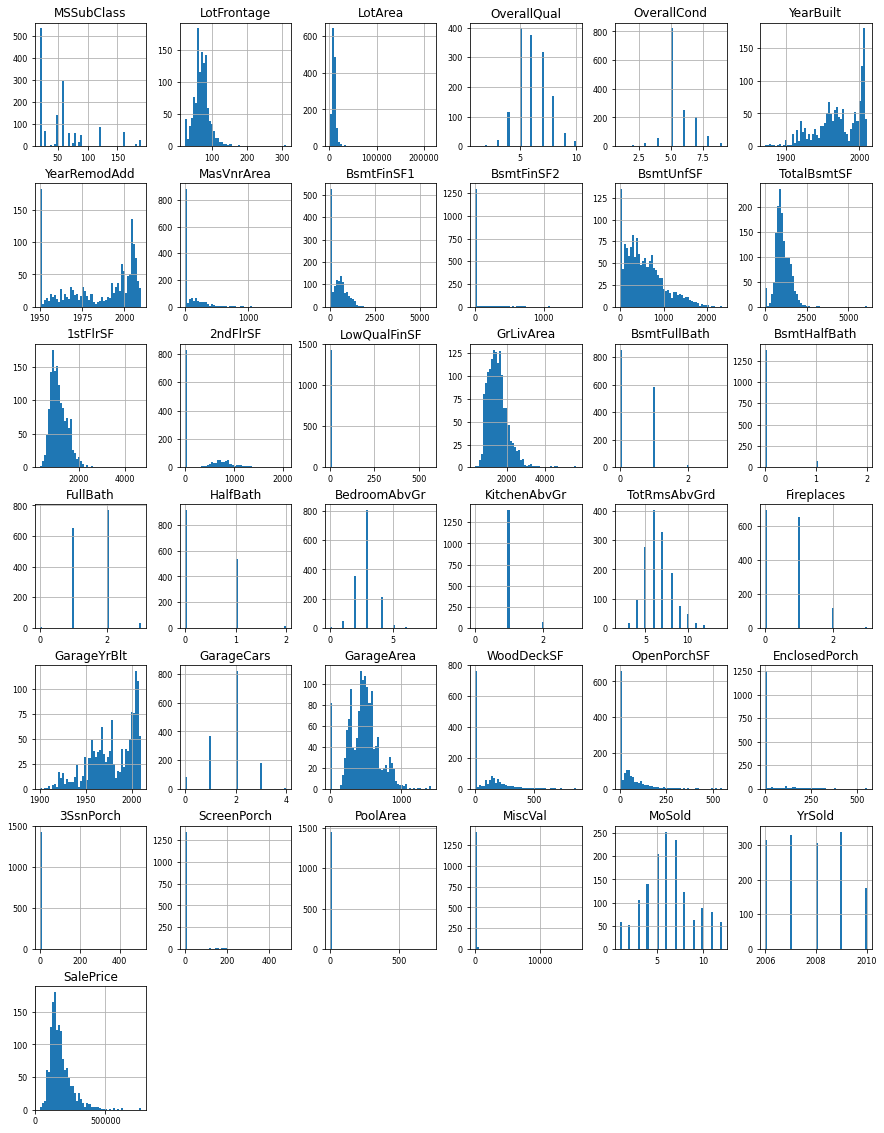

In [11]:
# plotting histogram of the numerical data types
num_df.hist(figsize=(15,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [12]:
# statiscal information of the dataset
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
num_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
# sum of null values in the numerical data of the train_df
num_df.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

only the LotFrontage and the GarageYrBlt columns contain null values. Hence, must be filled

## LotFrontage

In [15]:
# mean of the LotFrontage column
mean_FL = train_df['LotFrontage'].mean()

In [16]:
# fill null values in the LotFrontage column with the mean value
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(mean_FL)
num_df['LotFrontage'] = num_df['LotFrontage'].fillna(mean_FL)

## GarageYrBlt

In [17]:
# viewing the GArageYrBlt column
train_df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [18]:
# viewing value count of every element in the GarageYrBlt column
train_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [19]:
# fill null values in the GarageYrBlt column with the year that appears the most
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(2005)
num_df['GarageYrBlt'] = num_df['GarageYrBlt'].fillna(2005)

## MasVnrArea

In [20]:
# Mean of the MasVnrArea
mean_mva = train_df['MasVnrArea'].mean()

In [21]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(mean_mva)
num_df['MasVnrArea'] = num_df['MasVnrArea'].fillna(mean_mva)

In [22]:
# Viewing null values in the num_df
num_df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

The data above shows that, there are no null values in any numerical columns

## OBJECT DATA TYPES

In [23]:
# object dtypes
obj_df = train_df.select_dtypes(include='O')

In [24]:
# first five rows in the objects datasets
obj_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
# columns in the obj_df
obj_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
# sum of null values in the obj_df
obj_df.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

## Alley

In [27]:
# Viewing the elements in the Alley column
obj_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

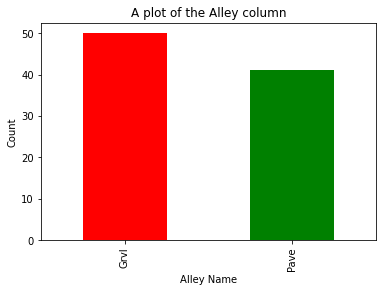

In [28]:
# Plotting a bar chart of the Alley column
obj_df['Alley'].value_counts().plot(kind='bar', color=['r', 'g'])
plt.title('A plot of the Alley column')
plt.xlabel('Alley Name')
plt.ylabel('Count')
plt.show()

In [29]:
# replacing the null values in the Alley column
obj_df['Alley'] = obj_df['Alley'].fillna('Grvl')
train_df['Alley'] = train_df['Alley'].fillna('Grvl')

## MasVnrType

In [30]:
# Viewing the elements in the Alley column
obj_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

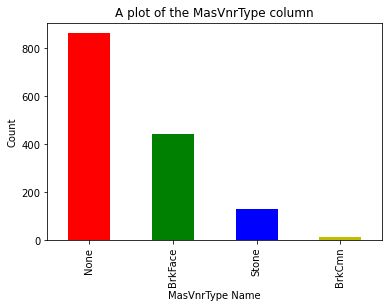

In [31]:
# Plotting a bar chart of the MasVnrType column
obj_df['MasVnrType'].value_counts().plot(kind='bar', color=['r', 'g', 'b', 'y'])
plt.title('A plot of the MasVnrType column')
plt.xlabel('MasVnrType Name')
plt.ylabel('Count')
plt.show()

Most houses had no Masonry veneer

In [32]:
# replacing the null values in the Alley column
obj_df['MasVnrType'] = obj_df['MasVnrType'].fillna('None')
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')

In [33]:
obj_df.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [34]:
# Viewing the elements in the BsmtQual column
obj_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

It was stated in the description file that, NA in the BsmtQual column means no basement. Hence, fill null values in this column with None

In [35]:
# fill null values with 'None'
obj_df['BsmtQual'] = obj_df['BsmtQual'].fillna('None')
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('None')

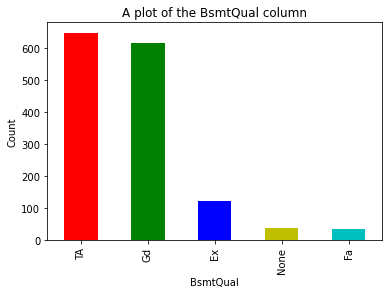

In [36]:
# Plotting a bar chart of the BsmtQual column
obj_df['BsmtQual'].value_counts().plot(kind='bar', color=['r', 'g', 'b', 'y', 'c'])
plt.title('A plot of the BsmtQual column')
plt.xlabel('BsmtQual')
plt.ylabel('Count')
plt.show()

The basement quality for most columns is typical

## BsmtCond

In [37]:
# Viewing the elements in the BsmtCond column
obj_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

It was stated in the description file that, NA in the BsmtCond column means no basement. Hence, fill null values in this column with None

In [38]:
# fill null values with 'None'
obj_df['BsmtCond'] = obj_df['BsmtCond'].fillna('None')
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('None')

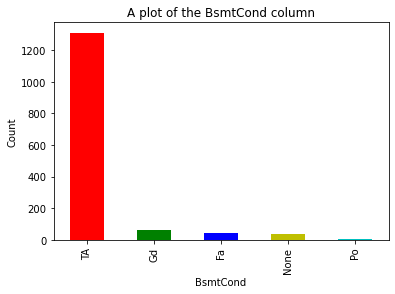

In [39]:
# Plotting a bar chart of the BsmtQual column
obj_df['BsmtCond'].value_counts().plot(kind='bar', color=['r', 'g', 'b', 'y', 'c'])
plt.title('A plot of the BsmtCond column')
plt.xlabel('BsmtCond')
plt.ylabel('Count')
plt.show()

Most basement's condition is typical

## Electrical

In [40]:
# Viewing the elements in the Electrical column
obj_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [41]:
# fill null values with 'None'
obj_df['Electrical'] = obj_df['Electrical'].fillna('SBrKr')
train_df['Electrical'] = train_df['Electrical'].fillna('SBrKr')

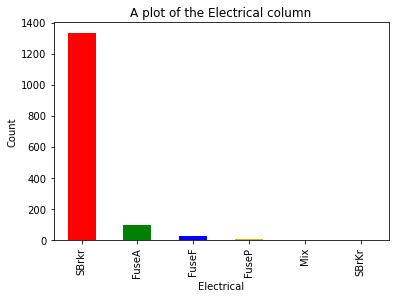

In [42]:
# Plotting a bar chart of the Electrical column
obj_df['Electrical'].value_counts().plot(kind='bar', color=['r', 'g', 'b', 'y', 'c'])
plt.title('A plot of the Electrical column')
plt.xlabel('Electrical')
plt.ylabel('Count')
plt.show()

Most of the electrical system is the Standard Circuit Breakers & Romex type

## The rest of the columns

In [43]:
# Filling the null values in the rest of the columns with 'None'
obj_df = obj_df.fillna('None')
train_df = train_df.fillna('None')

In [44]:
# sum of null values in the obj_df
obj_df.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Multivariate Analysis

In [46]:
# correlation of columns
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [47]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The data shows that, most houses costs less than $214,000.00

# Machine Learning Model

In [48]:
# load the test data set into pandas data frame
test_df = pd.read_csv('test.csv')

In [49]:
# view first 5 rows of the test data set
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### preparing data for machine learning

In [50]:
# Convert categorical columns to numerical columns
l1 = LabelEncoder()
train_df['MSZoning'] = l1.fit_transform(train_df['MSZoning'])
l2 = LabelEncoder()
train_df['Street'] = l2.fit_transform(train_df['Street'])
l3 = LabelEncoder()
train_df['Alley'] = l3.fit_transform(train_df['Alley'])
l4 = LabelEncoder()
train_df['LotShape'] = l4.fit_transform(train_df['LotShape'])
l5 = LabelEncoder()
train_df['LandContour'] = l5.fit_transform(train_df['LandContour'])
l6 = LabelEncoder()
train_df['Utilities'] = l6.fit_transform(train_df['Utilities'])
l7 = LabelEncoder()
train_df['LotConfig'] = l7.fit_transform(train_df['LotConfig'])
l8 = LabelEncoder()
train_df['LandSlope'] = l8.fit_transform(train_df['LandSlope'])
l9 = LabelEncoder()
train_df['Neighborhood'] = l9.fit_transform(train_df['Neighborhood'])
l10 = LabelEncoder()
train_df['MSZoning'] = l10.fit_transform(train_df['MSZoning'])
l11 = LabelEncoder()
train_df['Condition1'] = l11.fit_transform(train_df['Condition1'])
l12 = LabelEncoder()
train_df['Condition2'] = l12.fit_transform(train_df['Condition2'])
l13 = LabelEncoder()
train_df['BldgType'] = l13.fit_transform(train_df['BldgType'])
l14 = LabelEncoder()
train_df['HouseStyle'] = l14.fit_transform(train_df['HouseStyle'])
l15 = LabelEncoder()
train_df['RoofStyle'] = l15.fit_transform(train_df['RoofStyle'])
l16 = LabelEncoder()
train_df['RoofMatl'] = l16.fit_transform(train_df['RoofMatl'])
l17 = LabelEncoder()
train_df['Exterior1st'] = l17.fit_transform(train_df['Exterior1st'])
l18 = LabelEncoder()
train_df['Exterior2nd'] = l18.fit_transform(train_df['Exterior2nd'])
l19 = LabelEncoder()
train_df['MasVnrType'] = l19.fit_transform(train_df['MasVnrType'])
l20 = LabelEncoder()
train_df['ExterQual'] = l20.fit_transform(train_df['ExterQual'])
l21 = LabelEncoder()
train_df['ExterCond'] = l21.fit_transform(train_df['ExterCond'])
l22 = LabelEncoder()
train_df['Foundation'] = l22.fit_transform(train_df['Foundation'])
l23 = LabelEncoder()
train_df['BsmtQual'] = l23.fit_transform(train_df['BsmtQual'])
l24 = LabelEncoder()
train_df['BsmtCond'] = l24.fit_transform(train_df['BsmtCond'])
l25 = LabelEncoder()
train_df['BsmtExposure'] = l25.fit_transform(train_df['BsmtExposure'])
l26 = LabelEncoder()
train_df['BsmtFinType1'] = l26.fit_transform(train_df['BsmtFinType1'])
l27 = LabelEncoder()
train_df['BsmtFinType2'] = l27.fit_transform(train_df['BsmtFinType2'])
l28 = LabelEncoder()
train_df['Heating'] = l28.fit_transform(train_df['Heating'])
l29 = LabelEncoder()
train_df['HeatingQC'] = l29.fit_transform(train_df['HeatingQC'])
l30 = LabelEncoder()
train_df['CentralAir'] = l30.fit_transform(train_df['CentralAir'])
l31 = LabelEncoder()
train_df['Electrical'] = l31.fit_transform(train_df['Electrical'])
l32 = LabelEncoder()
train_df['KitchenQual'] = l32.fit_transform(train_df['KitchenQual'])
l33 = LabelEncoder()
train_df['Functional'] = l33.fit_transform(train_df['Functional'])
l34 = LabelEncoder()
train_df['FireplaceQu'] = l34.fit_transform(train_df['FireplaceQu'])
l35 = LabelEncoder()
train_df['GarageType'] = l35.fit_transform(train_df['GarageType'])
l36 = LabelEncoder()
train_df['GarageFinish'] =l36.fit_transform(train_df['GarageFinish'])
l37 = LabelEncoder()
train_df['GarageQual'] = l37.fit_transform(train_df['GarageQual'])
l38 = LabelEncoder()
train_df['GarageCond'] = l38.fit_transform(train_df['GarageCond'])
l39 = LabelEncoder()
train_df['PavedDrive'] = l39.fit_transform(train_df['PavedDrive'])
l40 = LabelEncoder()
train_df['PoolQC'] = l40.fit_transform(train_df['PoolQC'])
l41 = LabelEncoder()
train_df['Fence'] = l41.fit_transform(train_df['Fence'])
l42 = LabelEncoder()
train_df['MiscFeature'] = l42.fit_transform(train_df['MiscFeature'])
l43 = LabelEncoder()
train_df['SaleType'] = l43.fit_transform(train_df['SaleType'])
l44 = LabelEncoder()
train_df['SaleCondition'] = l44.fit_transform(train_df['SaleCondition'])

In [51]:
# view information about the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
# assign the feature and targets to variables
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [53]:
# Divide the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

### RandomForestRegressor

In [54]:
# import RandomForestRegressor
model = RandomForestRegressor(ccp_alpha=5)

In [55]:
# fit features and targets into the model
model.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=5)

In [56]:
# score of the model
print('The score of the model is: ' + str(model.score(X_train, y_train)))

The score of the model is: 0.9805628767735911


In [57]:
# predict y_values
y_preds = model.predict(X_test)

In [58]:
# accuracy score of the model
mean_absolute_error(y_test, y_preds)

15788.806506849314

In [59]:
mean_squared_error(y_test, y_preds)

758872391.8120805

### LinearRegression model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
Lr = LinearRegression()

In [62]:
Lr.fit(X_train, y_train)

LinearRegression()

In [63]:
Lr.score(X_train, y_train)

0.855798564852635

In [64]:
lr_pre = Lr.predict(X_test)

In [65]:
mean_absolute_error(y_test, lr_pre)

21194.19028621693

In [66]:
mean_squared_error(y_test, lr_pre)

1350315689.4633882

### DecisionTreeRegressor

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
DTR = DecisionTreeRegressor(ccp_alpha=0.0)

In [69]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
DTR.score(X_train, y_train)

1.0

In [71]:
dpre = DTR.predict(X_test)

In [72]:
mean_absolute_error(y_test, dpre)

25879.178082191782

In [73]:
mean_squared_error(y_test, dpre)

1357954779.4155252

The best model is the RandomForest Regressor since it gives the least amount of the mean_squared_error

# Preparing the test data for machine learning

In [74]:
# Import the test data into the pandas data frame
test_df  = pd.read_csv('test.csv')

In [75]:
# view the test data
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [76]:
# View information about the data set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [77]:
# size of the data set
test_df.shape

(1459, 80)

In [78]:
# View data types in the test_data
list(set(test_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [79]:
# viewing the numeric columns of the data
num_data = test_df.select_dtypes(include=['int64', 'float64'])

In [80]:
# Viewing the num_data column
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [81]:
# viewing columns in the num_data
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [82]:
# viewing information about each colum
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [83]:
# finding mean values of columns that contain null values
mean_lf = num_data['LotFrontage'].mean()
mean_vna = num_data['MasVnrArea'].mean()
mean_bf1 = num_data['BsmtFinSF1'].mean()
mean_bf2 = num_data['BsmtFinSF2'].mean()
mean_buf = num_data['BsmtUnfSF'].mean()
mean_bfb = num_data['BsmtFullBath'].mean()
mean_tsf = num_data['TotalBsmtSF'].mean()
mean_bhb = num_data['BsmtHalfBath'].mean()
mean_gyt = num_data['GarageYrBlt'].mean()
mean_gcar = num_data['GarageCars'].mean()
mean_garea = num_data['GarageArea'].mean()

In [84]:
# fill all columns which contain null values with the mean value of that column
num_data['LotFrontage'] = num_data['LotFrontage'].fillna(mean_lf)
num_data['MasVnrArea'] = num_data['MasVnrArea'].fillna(mean_vna)
num_data['BsmtFinSF1'] = num_data['BsmtFinSF1'].fillna(mean_bf1)
num_data['BsmtFinSF2'] = num_data['BsmtFinSF2'].fillna(mean_bf2)
num_data['BsmtUnfSF'] = num_data['BsmtUnfSF'].fillna(mean_buf)
num_data['BsmtFullBath'] = num_data['BsmtFullBath'].fillna(mean_bfb)
num_data['TotalBsmtSF'] = num_data['TotalBsmtSF'].fillna(mean_tsf)
num_data['BsmtHalfBath'] = num_data['BsmtHalfBath'].fillna(mean_bhb)
num_data['GarageYrBlt'] = num_data['GarageYrBlt'].fillna(mean_gyt)
num_data['GarageCars'] = num_data['GarageCars'].fillna(mean_gcar)
num_data['GarageArea'] = num_data['GarageArea'].fillna(mean_garea)

In [85]:
# viewing null values count in each column in num data
num_data.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

There are no null values in the num_data set

In [86]:
# assigning categorical columns to a variable
cat_data = test_df.select_dtypes(include='O')

In [87]:
# viewing the cat_data
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [88]:
# viewing columns and thier total number of null values
cat_data.isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

### MSZoning

In [89]:
# Value counts of elements in this column
cat_data['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [90]:
# replace null values with RL
cat_data['MSZoning'] = cat_data['MSZoning'].fillna('RL')

## Alley

In [91]:
# viewing value_counts of all elements in this column
cat_data['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [92]:
# Replace null values with Grvl
cat_data['Alley'] = cat_data['Alley'].fillna('Grvl')

### Utilities

In [93]:
# Viewing value counts of elements in this column
cat_data['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [94]:
# Replace null values with AllPub
cat_data['Utilities'] = cat_data['Utilities'].fillna('AllPub')

### Exterior1st

In [95]:
# Viewing value counts of elements in this column
cat_data['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [96]:
# Replace null values with VinylSd
cat_data['Exterior1st'] = cat_data['Exterior1st'].fillna('VinylSd')

### Exterior2nd

In [97]:
# Viewing value counts of elements in this column
cat_data['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [98]:
# Replace null values with VinylSd
cat_data['Exterior2nd'] = cat_data['Exterior2nd'].fillna('VinylSd')

### MasVnrType

In [99]:
# Viewing value counts of elements in this column
cat_data['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [100]:
# Replace null values with None
cat_data['MasVnrType'] = cat_data['MasVnrType'].fillna('None')

### BsmtQual, cond, exposure, fintype1, fintype2

In [101]:
# Replace null values with None
cat_data['BsmtQual'] = cat_data['BsmtQual'].fillna('None')
cat_data['BsmtCond'] = cat_data['BsmtCond'].fillna('None')
cat_data['BsmtExposure'] = cat_data['BsmtExposure'].fillna('None')
cat_data['BsmtFinType1'] = cat_data['BsmtFinType1'].fillna('None')
cat_data['BsmtFinType2'] = cat_data['BsmtFinType2'].fillna('None')

### KitchenQual

In [102]:
# Viewing the KitchenQual column
cat_data['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [103]:
# Replace null values with None
cat_data['KitchenQual'] = cat_data['KitchenQual'].fillna('TA')

# Functional

In [104]:
# Viewing the Functional column
cat_data['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [105]:
# Replace null values with Typ
cat_data['Functional'] = cat_data['Functional'].fillna('Typ')

### FireplaceQu

In [106]:
# Viewing the FireplaceQu column
cat_data['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [107]:
# Replace null values with Gd
cat_data['FireplaceQu'] = cat_data['FireplaceQu'].fillna('Gd')

### GarageType

In [108]:
# Viewing the GarageType column
cat_data['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [109]:
# Replace null values with Attchd
cat_data['GarageType'] = cat_data['GarageType'].fillna('Attchd')

### GarageFinish

In [110]:
# Viewing the GarageFinish column
cat_data['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [111]:
# Replace null values with Unf
cat_data['GarageFinish'] = cat_data['GarageFinish'].fillna('Unf')

### GarageQual

In [112]:
# Viewing the GarageQual column
cat_data['GarageQual'].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [113]:
# Replace null values with TA
cat_data['GarageQual'] = cat_data['GarageQual'].fillna('TA')

### GarageCond

In [114]:
# Viewing the GarageCond column
cat_data['GarageCond'].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [115]:
# Replace null values with TA
cat_data['GarageCond'] = cat_data['GarageCond'].fillna('TA')

### PoolQC

In [116]:
# Viewing the PoolQC column
cat_data['PoolQC'].value_counts()

Ex    2
Gd    1
Name: PoolQC, dtype: int64

In [117]:
# Replace null values with Ex
cat_data['PoolQC'] = cat_data['PoolQC'].fillna('Ex')

### Fence

In [118]:
# Viewing the Fence column
cat_data['Fence'].value_counts()

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64

In [119]:
# Replace null values with MnPrv
cat_data['Fence'] = cat_data['Fence'].fillna('MnPrv')

### MiscFeature

In [120]:
# Viewing the MiscFeature column
cat_data['MiscFeature'].value_counts()

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64

In [121]:
# Replace null values with Shed
cat_data['MiscFeature'] = cat_data['MiscFeature'].fillna('Shed')

### SaleType

In [122]:
# Viewing the MiscFeature column
cat_data['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [123]:
# Replace null values with Shed
cat_data['SaleType'] = cat_data['SaleType'].fillna('WD')

In [124]:
# Convert categorical columns to numerical columns
l1 = LabelEncoder()
cat_data['MSZoning'] = l1.fit_transform(cat_data['MSZoning'])
l2 = LabelEncoder()
cat_data['Street'] = l2.fit_transform(cat_data['Street'])
l3 = LabelEncoder()
cat_data['Alley'] = l3.fit_transform(cat_data['Alley'])
l4 = LabelEncoder()
cat_data['LotShape'] = l4.fit_transform(cat_data['LotShape'])
l5 = LabelEncoder()
cat_data['LandContour'] = l5.fit_transform(cat_data['LandContour'])
l6 = LabelEncoder()
cat_data['Utilities'] = l6.fit_transform(cat_data['Utilities'])
l7 = LabelEncoder()
cat_data['LotConfig'] = l7.fit_transform(cat_data['LotConfig'])
l8 = LabelEncoder()
cat_data['LandSlope'] = l8.fit_transform(cat_data['LandSlope'])
l9 = LabelEncoder()
cat_data['Neighborhood'] = l9.fit_transform(cat_data['Neighborhood'])
l10 = LabelEncoder()
cat_data['MSZoning'] = l10.fit_transform(cat_data['MSZoning'])
l11 = LabelEncoder()
cat_data['Condition1'] = l11.fit_transform(cat_data['Condition1'])
l12 = LabelEncoder()
cat_data['Condition2'] = l12.fit_transform(cat_data['Condition2'])
l13 = LabelEncoder()
cat_data['BldgType'] = l13.fit_transform(cat_data['BldgType'])
l14 = LabelEncoder()
cat_data['HouseStyle'] = l14.fit_transform(cat_data['HouseStyle'])
l15 = LabelEncoder()
cat_data['RoofStyle'] = l15.fit_transform(cat_data['RoofStyle'])
l16 = LabelEncoder()
cat_data['RoofMatl'] = l16.fit_transform(cat_data['RoofMatl'])
l17 = LabelEncoder()
cat_data['Exterior1st'] = l17.fit_transform(cat_data['Exterior1st'])
l18 = LabelEncoder()
cat_data['Exterior2nd'] = l18.fit_transform(cat_data['Exterior2nd'])
l19 = LabelEncoder()
cat_data['MasVnrType'] = l19.fit_transform(cat_data['MasVnrType'])
l20 = LabelEncoder()
cat_data['ExterQual'] = l20.fit_transform(cat_data['ExterQual'])
l21 = LabelEncoder()
cat_data['ExterCond'] = l21.fit_transform(cat_data['ExterCond'])
l22 = LabelEncoder()
cat_data['Foundation'] = l22.fit_transform(cat_data['Foundation'])
l23 = LabelEncoder()
cat_data['BsmtQual'] = l23.fit_transform(cat_data['BsmtQual'])
l24 = LabelEncoder()
cat_data['BsmtCond'] = l24.fit_transform(cat_data['BsmtCond'])
l25 = LabelEncoder()
cat_data['BsmtExposure'] = l25.fit_transform(cat_data['BsmtExposure'])
l26 = LabelEncoder()
cat_data['BsmtFinType1'] = l26.fit_transform(cat_data['BsmtFinType1'])
l27 = LabelEncoder()
cat_data['BsmtFinType2'] = l27.fit_transform(cat_data['BsmtFinType2'])
l28 = LabelEncoder()
cat_data['Heating'] = l28.fit_transform(cat_data['Heating'])
l29 = LabelEncoder()
cat_data['HeatingQC'] = l29.fit_transform(cat_data['HeatingQC'])
l30 = LabelEncoder()
cat_data['CentralAir'] = l30.fit_transform(cat_data['CentralAir'])
l31 = LabelEncoder()
cat_data['Electrical'] = l31.fit_transform(cat_data['Electrical'])
l32 = LabelEncoder()
cat_data['KitchenQual'] = l32.fit_transform(cat_data['KitchenQual'])
l33 = LabelEncoder()
cat_data['Functional'] = l33.fit_transform(cat_data['Functional'])
l34 = LabelEncoder()
cat_data['FireplaceQu'] = l34.fit_transform(cat_data['FireplaceQu'])
l35 = LabelEncoder()
cat_data['GarageType'] = l35.fit_transform(cat_data['GarageType'])
l36 = LabelEncoder()
cat_data['GarageFinish'] =l36.fit_transform(cat_data['GarageFinish'])
l37 = LabelEncoder()
cat_data['GarageQual'] = l37.fit_transform(cat_data['GarageQual'])
l38 = LabelEncoder()
cat_data['GarageCond'] = l38.fit_transform(cat_data['GarageCond'])
l39 = LabelEncoder()
cat_data['PavedDrive'] = l39.fit_transform(cat_data['PavedDrive'])
l40 = LabelEncoder()
cat_data['PoolQC'] = l40.fit_transform(cat_data['PoolQC'])
l41 = LabelEncoder()
cat_data['Fence'] = l41.fit_transform(cat_data['Fence'])
l42 = LabelEncoder()
cat_data['MiscFeature'] = l42.fit_transform(cat_data['MiscFeature'])
l43 = LabelEncoder()
cat_data['SaleType'] = l43.fit_transform(cat_data['SaleType'])
l44 = LabelEncoder()
cat_data['SaleCondition'] = l44.fit_transform(cat_data['SaleCondition'])

In [125]:
# viewing the cat_data
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2,1,0,3,3,0,4,0,12,1,...,1,2,3,4,2,0,2,2,8,4
1,3,1,0,0,3,0,0,0,12,2,...,1,2,3,4,2,0,2,0,8,4
2,3,1,0,0,3,0,4,0,8,2,...,1,0,3,4,2,0,2,2,8,4
3,3,1,0,0,3,0,4,0,8,2,...,1,0,3,4,2,0,2,2,8,4
4,3,1,0,0,1,0,4,0,22,2,...,1,1,3,4,2,0,2,2,8,4


In [126]:
# concatenating the cat and num data sets
new_test_df = num_data.join(cat_data)

In [127]:
# viewing the new_test_df
new_test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,1,2,3,4,2,0,2,2,8,4
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,1,2,3,4,2,0,2,0,8,4
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,1,0,3,4,2,0,2,2,8,4
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,1,0,3,4,2,0,2,2,8,4
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,1,1,3,4,2,0,2,2,8,4


# Prediction with model

In [128]:
# predicting the targets
sale_price = model.predict(new_test_df)

C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [129]:
# converting the targets into a data frame
sale_price = pd.DataFrame(sale_price)

In [130]:
# Viewing the sale price data
sale_price.head()

,0
0,75126.31
1,77730.27
2,82944.27
3,79476.27
4,74272.27


In [131]:
#Loading the sample submission data into pandas data frame
samp_sub = pd.read_csv('Samp_sub.csv')

In [132]:
# viewing the sample submission data set
samp_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [133]:
# replacing the Saleprice column with the target values 
samp_sub['SalePrice'] = sale_price

In [134]:
# Viewing the samp_sub data set
samp_sub.head(10)

,Id,SalePrice
0,1461,75126.31
1,1462,77730.27
2,1463,82944.27
3,1464,79476.27
4,1465,74272.27
5,1466,82984.16
6,1467,76303.27
7,1468,82669.16
8,1469,79856.09
9,1470,71046.27


In [135]:
# Viewing information about the samp_sub data
samp_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [136]:
# Saving the data into a csv file
samp_sub.to_csv('sample_submission.csv', index=False)